In [ ]:
import librosa # type: ignore
import librosa.display # type: ignore
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from scipy.fft import fft, fftfreq # type: ignore
from scipy import signal # type: ignore
import noisereduce as nr        # type: ignore


/Users/panya/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
audio_path_CondenserMic = 'AudioCapture/CondenserMic/Capture-2024-11-11 19_35_52.994114.wav'
audio_path_Horn1_white = 'AudioCapture/Horn#1(white Black)/Capture-2024-11-11 19_25_15.249917.wav'
audio_path_Horn2_Black = 'AudioCapture/Horn#2(Black)/Capture-2024-11-11 19_33_36.952996.wav'
audio_path_HornNANOWA = 'AudioCapture/HornNANOWA/Capture-2024-11-11 18_58_20.017754.wav'
audio_path_Parabolic_35cm = 'AudioCapture/Parabolic_35cm/Capture-2024-11-11 19_55_53.027987.wav'
audio_path_Parabolic_40cm = 'AudioCapture/Parabolic_40cm/Capture-2024-11-11 20_01_34.833323.wav'
audio_path_Parabolic_40cm_Aluminum = 'AudioCapture/Parabolic_40cm_Aluminum/Capture-2024-11-11 20_06_15.037987.wav'
audio_path_Parabolic_50cm = 'AudioCapture/Parabolic_50cm/Capture-2024-11-11 20_12_00.565965.wav'
audio_path_ShutGunMic = 'AudioCapture/ShutGunMic/Capture-2024-11-11 19_47_15.633274.wav'
audio_path_ShutGunMicWithPreAmp = 'AudioCapture/ShutGunMicWithPreAmp/Capture-2024-11-11 19_50_03.621044.wav'

audio_path = [audio_path_CondenserMic, audio_path_Horn1_white, audio_path_Horn2_Black, audio_path_HornNANOWA,
              audio_path_Parabolic_35cm, audio_path_Parabolic_40cm, audio_path_Parabolic_40cm_Aluminum, audio_path_Parabolic_50cm,
              audio_path_ShutGunMic,audio_path_ShutGunMicWithPreAmp]

print(audio_path)

['AudioCapture/CondenserMic/Capture-2024-11-11 19_35_52.994114.wav', 'AudioCapture/Horn#1(white Black)/Capture-2024-11-11 19_25_15.249917.wav', 'AudioCapture/Horn#2(Black)/Capture-2024-11-11 19_33_36.952996.wav', 'AudioCapture/HornNANOWA/Capture-2024-11-11 18_58_20.017754.wav', 'AudioCapture/Parabolic_35cm/Capture-2024-11-11 19_55_53.027987.wav', 'AudioCapture/Parabolic_40cm/Capture-2024-11-11 20_01_34.833323.wav', 'AudioCapture/Parabolic_40cm_Aluminum/Capture-2024-11-11 20_06_15.037987.wav', 'AudioCapture/Parabolic_50cm/Capture-2024-11-11 20_12_00.565965.wav', 'AudioCapture/ShutGunMic/Capture-2024-11-11 19_47_15.633274.wav', 'AudioCapture/ShutGunMicWithPreAmp/Capture-2024-11-11 19_50_03.621044.wav']


In [3]:
# Load the Drone audio file
audio_file = audio_path[1]
y, fs = librosa.load(audio_file)  # , duration=20)

# normalize audio  
# max_value = np.max(np.abs(y))       # Determine the maximum values
# audio = y/max_value        # Use max_value and normalize sound data to get values between -1 & +1

timesDuration = librosa.get_duration(y=y, sr=fs)

print(f'Sampling Rate: {fs} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

Sampling Rate: 22050 Hz
Audio Duration: 10 seconds


In [4]:
# Calculate Spectrogram by using SFTF method
def spectrogram_cal(data,fs):
    ms = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=2048, hop_length=128, n_mels=256)
    spectrogram_db = librosa.power_to_db(ms, ref=np.max)
    
    return spectrogram_db

In [5]:
# ----- 1-D discrete Fourier transforms ------
def audioFFT_cal (data,fs):
    N = int(fs * timesDuration)         #   Number of sample points

    T = 1.0 / (fs)   # sample spacing
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(data)
    Xf = fftfreq(N, T)[:N//2]
    FFT_Amplitude = 10*np.log(np.abs(yf[0:N//2]))
    
    return Xf,FFT_Amplitude

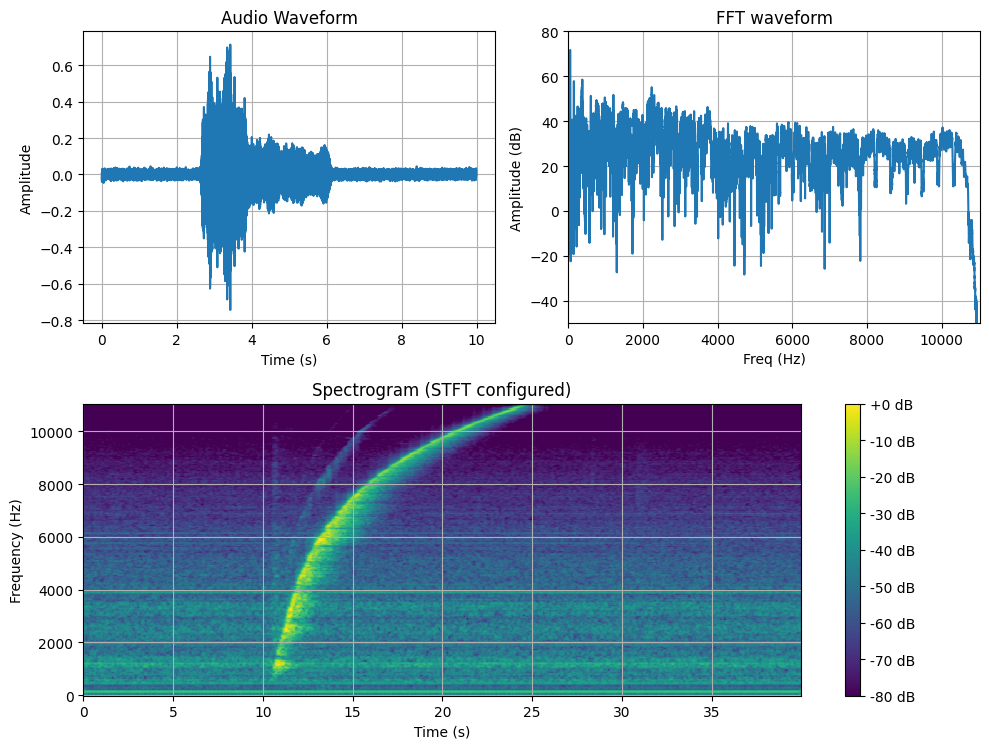

In [6]:
y_signal = y

plt.figure(figsize=(10, 8))

# ----- Plot Audio Waveform  -----
plt.subplot(2, 2, 1)
plt.title(f'Audio Waveform')
plt.plot(np.linspace(0, len(y_signal) / fs, len(y_signal)), y_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
# ----- Plot FFT  -----
xf,yf = audioFFT_cal(y_signal,fs)    
plt.subplot(2, 2, 2)
plt.title(f'FFT waveform')
plt.plot(xf, yf)
plt.grid()
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (dB)')
plt.ylim(-50,80)
plt.xlim(0,np.max(xf))

# ------- Plot Spectrogram ---------
spectrogram_db = spectrogram_cal(y_signal,fs)
plt.subplot(2, 1, 2)
plt.title(f'Spectrogram')
librosa.display.specshow(spectrogram_db, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
#cmap = 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT configured)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
# Set the parameters for the Noise reduce
stationary=True
prop_decrease=1
n_std_thresh_stationary = 1

# Set the parameters for the PSD
NFFT = 2048
noverlap = NFFT // 2

PSD = []
Freq = []

for audio_file in audio_path:
        y, fs = librosa.load(audio_file)  # , duration=20)

        # perform noise reduction
        audio_reduced_noise = nr.reduce_noise(y=y, sr=fs, stationary=stationary, prop_decrease=prop_decrease, n_std_thresh_stationary=n_std_thresh_stationary) 

        # Compute the PSD of the audio signal
        f_Drone, psd_Drone = signal.welch(y, fs=fs, nperseg=NFFT, noverlap=noverlap)
        
        PSD.append(psd_Drone)
        Freq.append(f_Drone)


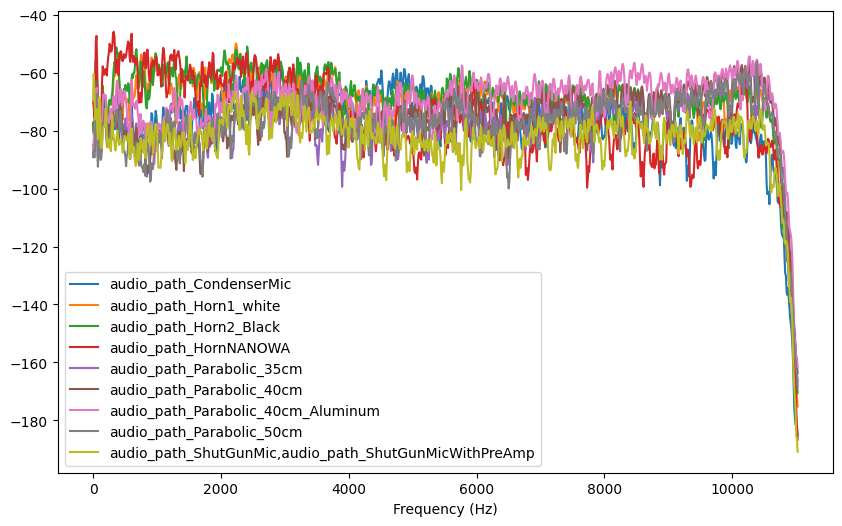

In [8]:

audio_name_path = ['audio_path_CondenserMic', 'audio_path_Horn1_white', 'audio_path_Horn2_Black', 'audio_path_HornNANOWA',
              'audio_path_Parabolic_35cm', 'audio_path_Parabolic_40cm', 'audio_path_Parabolic_40cm_Aluminum', 'audio_path_Parabolic_50cm',
              'audio_path_ShutGunMic,audio_path_ShutGunMicWithPreAmp']

plt.figure(figsize=(10, 6))
for i in range(len(audio_name_path)):
    plt.plot(Freq[i], 10*np.log10(PSD[i]),label=audio_name_path[i])
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()

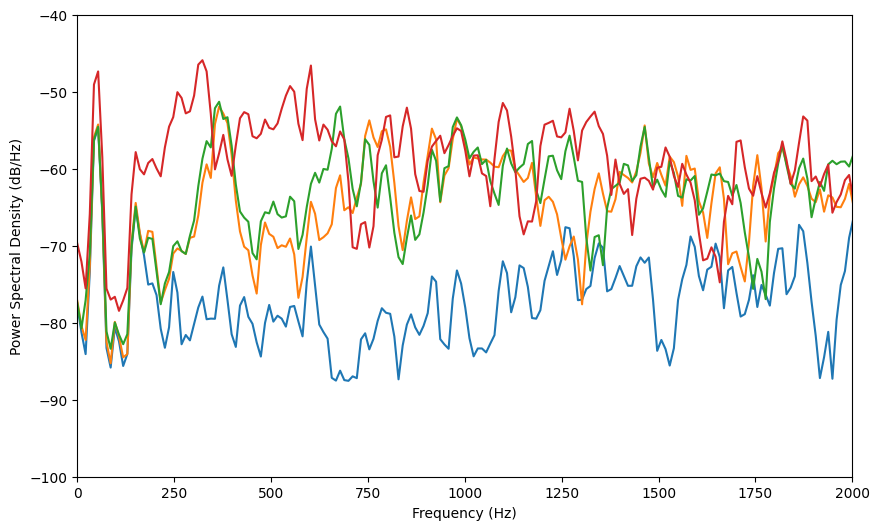

In [9]:

audio_name_path = ['audio_path_CondenserMic', 'audio_path_Horn1_white', 'audio_path_Horn2_Black', 'audio_path_HornNANOWA',
              'audio_path_Parabolic_35cm', 'audio_path_Parabolic_40cm', 'audio_path_Parabolic_40cm_Aluminum', 'audio_path_Parabolic_50cm',
              'audio_path_ShutGunMic,audio_path_ShutGunMicWithPreAmp']

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(Freq[i], 10*np.log10(PSD[i]),label=audio_name_path[i])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.xlim(0,2000)
plt.ylim(-100,-40)
#plt.legend()
plt.show()